# Лабораторная работа №4

### Используемые библиотеки

In [330]:
import pandas as pd
from numpy import arange
import networkx as nx
import mlxtend.frequent_patterns as fp
import mlxtend.preprocessing as pp
from matplotlib import pyplot as plt

### Исходные данные:
[`groceries - groceries.csv`](https://www.kaggle.com/irfanasrullah/groceries)

## Загрузка данных

In [240]:
all_data = pd.read_csv('groceries - groceries.csv')
print(all_data)

      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

In [241]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [242]:
unique_items = set([elem for row in np_data for elem in row])
print(f"Уникальные товары: {unique_items}")
print(f"Всего: {len(unique_items)}")

Уникальные товары: {'dish cleaner', 'tropical fruit', 'bags', 'salad dressing', 'cake bar', 'nut snack', 'oil', 'kitchen towels', 'sparkling wine', 'liquor', 'decalcifier', 'cream', 'other vegetables', 'Instant food products', 'organic sausage', 'preservation products', 'chewing gum', 'waffles', 'popcorn', 'cling film/bags', 'meat', 'light bulbs', 'softener', 'photo/film', 'beef', 'rubbing alcohol', 'brown bread', 'sauces', 'seasonal products', 'dishes', 'canned vegetables', 'cleaner', 'newspapers', 'cooking chocolate', 'baking powder', 'jam', 'toilet cleaner', 'frozen fish', 'misc. beverages', 'baby cosmetics', 'abrasive cleaner', 'hygiene articles', 'flower soil/fertilizer', 'dental care', 'salt', 'candy', 'candles', 'turkey', 'butter milk', 'beverages', 'pudding powder', 'house keeping products', 'rum', 'frozen vegetables', 'meat spreads', 'tidbits', 'frozen fruits', 'frankfurter', 'cat food', 'condensed milk', 'pasta', 'white bread', 'fruit/vegetable juice', 'curd', 'onions', 'mayo

## FPGrowth и FPMax

In [243]:
te = pp.TransactionEncoder()
data = pd.DataFrame(te.fit_transform(np_data), columns=te.columns_)

In [244]:
result = fp.fpgrowth(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(whole milk, pastry)"
59,0.047382,"(root vegetables, other vegetables)"
60,0.048907,"(root vegetables, whole milk)"
61,0.030605,"(sausage, rolls/buns)"


In [245]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.25551601423487547 ['whole milk']
        минимальное - 0.03040162684290798 ['specialty chocolate']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030096593797661414 ['pip fruit', 'whole milk']
    


In [246]:
result = fp.fpmax(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.030402,(specialty chocolate)
1,0.031012,(onions)
2,0.032944,(hygiene articles)
3,0.033249,(berries)
4,0.033249,(hamburger meat)
5,0.033452,(UHT-milk)
6,0.033859,(sugar)
7,0.037112,(dessert)
8,0.037417,(long life bakery product)
9,0.037824,(salty snack)


In [247]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.09852567361464158 ['shopping bags']
        минимальное - 0.03040162684290798 ['specialty chocolate']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030096593797661414 ['whole milk', 'pip fruit']
    


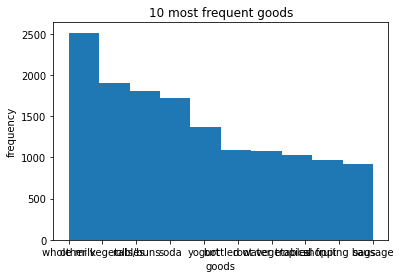

In [248]:
frequent = list(map(lambda item: sum(sum(1 for it in st if it == item) for st in np_data), unique_items))
labeled = sorted(zip(unique_items, frequent), key=lambda x: x[1], reverse=True)[:10]

axis = plt.gca()
axis.hist(range(0, len(labeled)), weights=list(map(lambda x: x[1], labeled)), bins=10)
axis.set_title("10 most frequent goods")
axis.set_xlabel("goods")
axis.set_ylabel("frequency")
axis.set_xticks(range(0, len(labeled)))
axis.set_xticklabels(list(map(lambda x: x[0], labeled)))
plt.show()

In [249]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables', 'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]

te = pp.TransactionEncoder()
data = pd.DataFrame(te.fit_transform(np_data), columns=te.columns_)

In [250]:
result = fp.fpmax(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.057651,(pork)
1,0.032232,"(whipped/sour cream, whole milk)"
2,0.077682,(canned beer)
3,0.080529,(bottled beer)
4,0.030503,"(whole milk, citrus fruit)"
5,0.033249,"(whole milk, pastry)"
6,0.030605,"(sausage, rolls/buns)"
7,0.098526,(shopping bags)
8,0.035892,"(other vegetables, tropical fruit)"
9,0.042298,"(whole milk, tropical fruit)"


In [251]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.09852567361464158 ['shopping bags']
        минимальное - 0.05765124555160142 ['pork']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030503304524656837 ['whole milk', 'citrus fruit']
    


In [252]:
result = fp.fpgrowth(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


In [253]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.25551601423487547 ['whole milk']
        минимальное - 0.05765124555160142 ['pork']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030503304524656837 ['whole milk', 'citrus fruit']
    


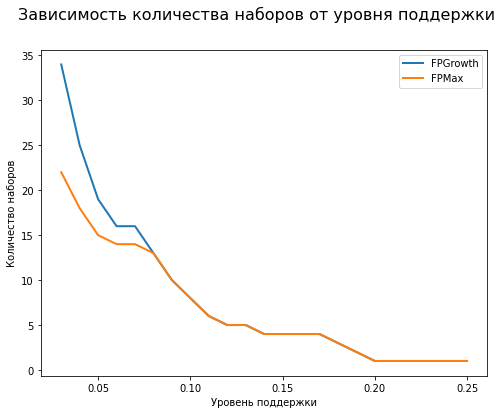

In [254]:
min_sups = arange(0.03, 0.26, 0.01)
counts_of_itemesets = []
results = []

for min_sup in min_sups:
    fpgrowth_res = fp.fpgrowth(data, min_support=min_sup, use_colnames=True)
    fpmax_res = fp.fpmax(data, min_support=min_sup, use_colnames=True)
    results.append((fpgrowth_res, fpmax_res))

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Зависимость количества наборов от уровня поддержки', fontsize=16)
ax.plot(min_sups, list(map(lambda x: len(x[0]), results)), linewidth=2, label='FPGrowth')
ax.plot(min_sups, list(map(lambda x: len(x[1]), results)), linewidth=2, label='FPMax')
ax.set_xlabel('Уровень поддержки')
ax.set_ylabel('Количество наборов')
plt.legend()
plt.show()

## Ассоциативные правила

In [255]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

In [256]:
result = fp.fpgrowth(data, min_support=0.005, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
...,...,...
262,0.010168,"(whole milk, other vegetables, pork)"
263,0.006202,"(whole milk, pork, rolls/buns)"
264,0.005592,"(other vegetables, rolls/buns, pork)"
265,0.007016,"(root vegetables, other vegetables, pork)"


In [263]:
rules = fp.association_rules(result, min_threshold=0.3)
pd.DataFrame(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
1,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674
2,"(whole milk, citrus fruit)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,0.006014,1.297233
3,"(citrus fruit, yogurt)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,0.004736,1.415849
4,"(citrus fruit, yogurt)",(other vegetables),0.021657,0.193493,0.007626,0.352113,1.819773,0.003435,1.244827
...,...,...,...,...,...,...,...,...,...
193,"(pork, rolls/buns)",(other vegetables),0.011286,0.193493,0.005592,0.495495,2.560798,0.003408,1.598613
194,"(root vegetables, pork)",(other vegetables),0.013625,0.193493,0.007016,0.514925,2.661214,0.004379,1.662646
195,"(other vegetables, pork)",(root vegetables),0.021657,0.108998,0.007016,0.323944,2.972002,0.004655,1.317940
196,"(root vegetables, pork)",(whole milk),0.013625,0.255516,0.006812,0.500000,1.956825,0.003331,1.488968


In [273]:
fp.association_rules(result, metric='support', min_threshold=0.045)

count    10.000000
mean      0.056756
std       0.010294
min       0.047382
25%       0.048907
50%       0.056024
75%       0.056634
max       0.074835
Name: support, dtype: float64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
2,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
8,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
9,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913


In [285]:
fp.association_rules(result, metric='confidence', min_threshold=0.573)

count    10.000000
mean      0.007605
std       0.002229
min       0.005186
25%       0.005923
50%       0.007321
75%       0.007905
max       0.012303
Name: support, dtype: float64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
1,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566
2,"(yogurt, other vegetables, tropical fruit)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317
3,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
4,"(root vegetables, whole milk, tropical fruit)",(other vegetables),0.011998,0.193493,0.007016,0.584746,3.022057,0.004694,1.942201
5,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613
6,"(root vegetables, yogurt, other vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
7,"(root vegetables, other vegetables, whipped/so...",(whole milk),0.008541,0.255516,0.005186,0.607143,2.376144,0.003003,1.895050
8,"(whipped/sour cream, citrus fruit)",(whole milk),0.010880,0.255516,0.006304,0.579439,2.267722,0.003524,1.770217
9,"(whipped/sour cream, tropical fruit)",(whole milk),0.013828,0.255516,0.007931,0.573529,2.244593,0.004398,1.745687


In [299]:
fp.association_rules(result, metric='lift', min_threshold=4.15)

count    10.000000
mean      0.006365
std       0.000848
min       0.005694
25%       0.005694
50%       0.005796
75%       0.007016
max       0.007626
Name: support, dtype: float64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(root vegetables, citrus fruit)","(whole milk, other vegetables)",0.017692,0.074835,0.005796,0.327586,4.377460,0.004472,1.375887
1,"(whole milk, other vegetables)","(root vegetables, citrus fruit)",0.074835,0.017692,0.005796,0.077446,4.377460,0.004472,1.064770
2,"(whole milk, tropical fruit)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
3,"(yogurt, other vegetables)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
4,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748
5,"(whole milk, other vegetables)","(root vegetables, tropical fruit)",0.074835,0.021047,0.007016,0.093750,4.454257,0.005441,1.080224
6,"(root vegetables, tropical fruit)","(whole milk, yogurt)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059
7,"(root vegetables, yogurt)","(whole milk, tropical fruit)",0.025826,0.042298,0.005694,0.220472,5.212371,0.004602,1.228567
8,"(whole milk, tropical fruit)","(root vegetables, yogurt)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712
9,"(whole milk, yogurt)","(root vegetables, tropical fruit)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703


In [327]:
fp.association_rules(result, metric='leverage', min_threshold=0.016)

       antecedent support  consequent support    support  confidence  \
count           10.000000           10.000000  10.000000   10.000000   
mean             0.184403            0.184403   0.054113    0.315578   
std              0.058522            0.058522   0.011737    0.095988   
min              0.108998            0.108998   0.043416    0.191405   
25%              0.139502            0.139502   0.047382    0.229506   
50%              0.193493            0.193493   0.048907    0.302051   
75%              0.240010            0.240010   0.056024    0.397892   
max              0.255516            0.255516   0.074835    0.448694   

            lift   leverage  conviction  
count  10.000000  10.000000   10.000000  
mean    1.739292   0.021909    1.204016  
std     0.280381   0.003786    0.109631  
min     1.513634   0.016424    1.101913  
25%     1.571735   0.020379    1.117214  
50%     1.608457   0.021056    1.175435  
75%     1.756031   0.025394    1.236602  
max     2.24660

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
4,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
5,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
8,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
9,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913


In [328]:
fp.association_rules(result, metric='conviction', min_threshold=1.78)

       antecedent support  consequent support    support  confidence  \
count           10.000000           10.000000  10.000000   10.000000   
mean             0.012506            0.218302   0.007483    0.603667   
std              0.004183            0.032029   0.002325    0.042072   
min              0.008134            0.193493   0.005186    0.548387   
25%              0.009227            0.193493   0.005719    0.584592   
50%              0.012150            0.193493   0.007321    0.596253   
75%              0.013599            0.255516   0.007829    0.616662   
max              0.021047            0.255516   0.012303    0.700000   

            lift   leverage  conviction  
count  10.000000  10.000000   10.000000  
mean    2.802042   0.004804    1.990295  
std     0.315799   0.001633    0.202919  
min     2.372842   0.003003    1.785838  
25%     2.504250   0.003718    1.892005  
50%     2.880119   0.004506    1.941723  
75%     3.021793   0.005039    1.956002  
max     3.27316

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
1,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566
2,"(yogurt, other vegetables, tropical fruit)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317
3,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
4,"(root vegetables, whole milk, tropical fruit)",(other vegetables),0.011998,0.193493,0.007016,0.584746,3.022057,0.004694,1.942201
5,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613
6,"(root vegetables, yogurt, other vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
7,"(root vegetables, whole milk, whipped/sour cream)",(other vegetables),0.009456,0.193493,0.005186,0.548387,2.834150,0.003356,1.785838
8,"(root vegetables, other vegetables, whipped/so...",(whole milk),0.008541,0.255516,0.005186,0.607143,2.376144,0.003003,1.895050
9,"(whipped/sour cream, tropical fruit)",(other vegetables),0.013828,0.193493,0.007829,0.566176,2.926088,0.005154,1.859068


In [329]:
rules.iloc[:,2:].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.012506,0.218302,0.007483,0.603667,2.802042,0.004804,1.990295
std,0.004183,0.032029,0.002325,0.042072,0.315799,0.001633,0.202919
min,0.008134,0.193493,0.005186,0.548387,2.372842,0.003003,1.785838
25%,0.009227,0.193493,0.005719,0.584592,2.504250,0.003718,1.892005
50%,0.012150,0.193493,0.007321,0.596253,2.880119,0.004506,1.941723
75%,0.013599,0.255516,0.007829,0.616662,3.021793,0.005039,1.956002
max,0.021047,0.255516,0.012303,0.700000,3.273165,0.008231,2.481613


(-1.2037113774881274,
 1.1438197345179113,
 -0.7278747687439088,
 0.7814927705774435)

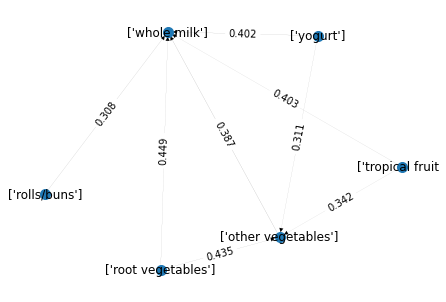

In [343]:
result = fp.fpgrowth(data, min_support=0.035, use_colnames=True)
rules = fp.association_rules(result, min_threshold=0.3, metric='confidence')

digraph = nx.DiGraph()
for i in range(rules.shape[0]):
    digraph.add_edge(rules.iloc[i].antecedents, rules.iloc[i].consequents, weight=rules.iloc[i].support, label=round(rules.iloc[i].confidence,3))

pos = nx.spring_layout(digraph)
nx.draw(digraph, pos, labels={node: str(list(node)) for node in digraph.nodes()}, width=[digraph[u][v]['weight'] for u,v in digraph.edges()], node_size=100)
nx.draw_networkx_edge_labels(digraph, pos, edge_labels=nx.get_edge_attributes(digraph, 'label'))
plt.axis('off')

In [344]:
pd.DataFrame(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
2,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
3,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
4,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
5,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
